In [410]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

%matplotlib inline

## Kaggle University Ranking Data Exploration

Datasets used in this exercise were collected from this kaggle page:
https://www.kaggle.com/mylesoneill/world-university-rankings

### Background

As with anything, people are generally interested in how things stack up to each other - even for schools! There are a few organizations that have come up with their own methodology for ranking Universities. We look at the three main University ranking organizations here:

1. Times https://www.timeshighereducation.com/world-university-rankings
2. AWRU (Shanghai Ranking) - http://www.shanghairanking.com/
3. Center for World University Rankings - http://cwur.org/

There are 6 csv files provided on that page, and a suggestions for picking apart the data:

* How do these rankings compare to each other?
* Are the various criticisms levied against these rankings fair or not?
* How does your alma mater fare against the world?

The supplemental data provided in the kaggle change has information about national education funding and attainment rates. 

For this exercise I'm going to use the questions below as a guiding post for the data exploration but may end up deviating.

### Questions 

1. Evaluation of data completeness
2. Compare the top ranking universities for the three systems over time
3. Look up my alma maters in the various systems and compare the rankings
4. Evaluate if the criticsm of Times and AWRU ranking is fair (maybe..)

First we read in the data:

In [413]:
df_times = pd.read_csv('timesData.csv')
df_shang = pd.read_csv('shanghaiData.csv')
df_cwur = pd.read_csv('cwurData.csv')

Next, looking at data completeness for the Times ranking:

In [414]:
(df_times.count()/len(df_times)*100.0).round()

world_rank                100.0
university_name           100.0
country                   100.0
teaching                  100.0
international             100.0
research                  100.0
citations                 100.0
income                    100.0
total_score               100.0
num_students               98.0
student_staff_ratio        98.0
international_students     97.0
female_male_ratio          91.0
year                      100.0
dtype: float64

The series above shows the columns in the times ranking. It also gives a sense of data completeness. The female_male_ratio column is missing the most information (has the most NaN rows), but overall the data looks good at a first glance. Also the columns are self-descreptive and easy to understand.

In [4]:
df_times.year.value_counts().sort_index()

2011    200
2012    402
2013    400
2014    400
2015    401
2016    800
Name: year, dtype: int64

Quick look at the range for the Times data. We have ranking data from 2011 - 2016, with 800 schools ranked in 800 (up from only a quarter of that in 2011).<br><br>
Next we look at the AWRU (or Shanghai) ranking:

In [416]:
df_shang.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [417]:
(df_shang.count()/len(df_shang)*100.0).round()

world_rank         100.0
university_name    100.0
national_rank      100.0
total_score         22.0
alumni             100.0
award              100.0
hici               100.0
ns                 100.0
pub                100.0
pcp                100.0
year               100.0
dtype: float64

Interesting we are missing a lot of data from _total score_ column. Other than that, data completeness is good. The columns are acronyms and are not self-descritptive. May need to look up the the descriptions on the Ranking website (http://www.shanghairanking.com/)

In [418]:
df_shang[98:105]

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
98,99,Lund University,4,24.3,29.4,0.0,24.8,19.4,50.1,18.1,2005
99,100,Tufts University,53,23.9,18.8,17.1,20.8,19.1,37.4,25.2,2005
100,101-152,Aarhus University,2,NaN,15.4,19.3,7.9,22.3,41.6,22.4,2005
101,101-152,Arizona State University - Tempe,54-71,NaN,0.0,14.4,20.8,26.3,41.9,17.5,2005
102,101-152,Baylor College of Medicine,54-71,NaN,0.0,0.0,17.6,34.5,44.0,24.9,2005
103,101-152,Catholic University of Leuven,1-4,NaN,0.0,0.0,19.2,16.0,48.7,23.1,2005
104,101-152,Catholic University of Louvain,1-4,NaN,14.0,13.9,13.6,8.3,44.7,26.9,2005


Looking at a section further down in the ARWU rank, looks like total score is actually filled with NaN. Also we start seeing the world-rank national rank is not a solid integer value but a range _after_ 100. Looks like we may need to use the index as the actual rank! 

In [419]:
df_shang.year.value_counts().sort_index()

2005    500
2006    500
2007    510
2008    503
2009    501
2010    500
2011    500
2012    284
2013     99
2014    500
2015    500
Name: year, dtype: int64

Our ARWU ranking set dates back to 2005, also we do not have a 2016 ranking (compared to Times).<br><br>
Finally, taking a look at the data completeness of the CWUR ranking:

In [420]:
df_cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [421]:
(df_cwur.count()/len(df_cwur)*100.0).round()

world_rank              100.0
institution             100.0
country                 100.0
national_rank           100.0
quality_of_education    100.0
alumni_employment       100.0
quality_of_faculty      100.0
publications            100.0
influence               100.0
citations               100.0
broad_impact             91.0
patents                 100.0
score                   100.0
year                    100.0
dtype: float64

In [422]:
df_cwur.year.value_counts().sort_index()

2012     100
2013     100
2014    1000
2015    1000
Name: year, dtype: int64

The CWUR data is interesting, overall complete with the exception of the 'broad_impact' column. The data set dates back only to 2012, does not have a 2016 year and interestingly only has 100 entries per year for 2012 and 2013 (likely just a 1-100 rank)

### Calculating the AWRU Indicator Weights

A school's 'world rank' is determined by ranking its 'total score' against all other schools. The higher the total score, the better (closer to 1) the rank. The 'total score' is determined using a varierty of criteria, assigned a certain weight, then summed together. We have data for not just a school's world rank and total score, but also the scores for the individual indicators that make up its total score. In this exercise, I'll try to find out the weight assigned to each indicator using the available data, starting with the Shanghai dataset.

Below are the individual indicators in the Shanghai dataset:

* <b>alumni</b>: based on the number of alumni of an institution winning nobel prizes and fields medals
* <b>award</b>: based on the number of staff of an institution winning Nobel Prizes in Physics, Chemistry, Medicine, and Economics and Fields Medals in Mathematics
* <b>hici</b>: based on the number of Highly Cited Researchers selected by Thomson Reuters
* <b>ns</b>: based on the number of papers published in Nature and Science
* <b>pub</b>: based on total number of papers indexed in the Science Citation Index-Expanded and Social Science Citation Index
* <b>pcp</b>: the weighted scores of the above five indicators divided by the number of full time academic staff

ARWU judges come up with a score from 1 - 100 for each criteria. After the scores are given, the weights are applied and summed so that the the school is left with a total overall score.

In [423]:
df_shang_reg = df_shang.copy()
cols = ['total_score','alumni','award','hici','ns','pub','pcp'] #dropping the school name
df_shang_reg = df_shang_reg[cols]
df_shang_reg.head()

,total_score,alumni,award,hici,ns,pub,pcp
0,100.0,100.0,100.0,100.0,100.0,100.0,72.4
1,73.6,99.8,93.4,53.3,56.6,70.9,66.9
2,73.4,41.1,72.2,88.5,70.9,72.3,65.0
3,72.8,71.8,76.0,69.4,73.9,72.2,52.7
4,70.1,74.0,80.6,66.7,65.8,64.3,53.0


We can use the statsmodel OLS (ordinary least squares) package to back-calculate the indicator weights. The OLS model applies a multiple linear regression to the data:

In [425]:
result = sm.ols(formula = 'total_score ~ alumni + award + hici + ns + pub + pcp - 1',
               data = df_shang_reg).fit()
print (result.params)

alumni    0.103306
award     0.205507
hici      0.206384
ns        0.205225
pub       0.205558
pcp       0.101755
dtype: float64


The params give the equation:<br><br>
$totalscore = alumni*0.1 + award*0.2 + hici*0.2 + ns*0.2 + pub*0.2 + pcp*0.1$

Conviently, the actual weights are published here: http://www.shanghairanking.com/ARWU-Methodology-2017.html and match. The *exact* values are likely off from their whole number value (ex. alumni is calculated as 0.103306 instead of exactly 0.1) because the dataset gives 1 decimal resolution on the scores, but the real values might have more figures.

In [426]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.588e+07
Date:                Sat, 25 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:27:27   Log-Likelihood:                 1119.1
No. Observations:                1101   AIC:                            -2226.
Df Residuals:                    1095   BIC:                            -2196.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alumni         0.1033      0.000    458.323      0.0

Add notes on the R squared value, adjusted R squared, the different weights and what that suggests. What about the different parameters.

Refer to http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [427]:
df_shang_reg[['alumni', 'award', 'hici', 'ns', 'pub','pcp']].corr()

,alumni,award,hici,ns,pub,pcp
alumni,1.000000,0.763562,0.620527,0.694470,0.516182,0.672102
award,0.763562,1.000000,0.669609,0.735800,0.468816,0.729365
hici,0.620527,0.669609,1.000000,0.868726,0.674076,0.690232
ns,0.694470,0.735800,0.868726,1.000000,0.699849,0.758854
pub,0.516182,0.468816,0.674076,0.699849,1.000000,0.534018
pcp,0.672102,0.729365,0.690232,0.758854,0.534018,1.000000


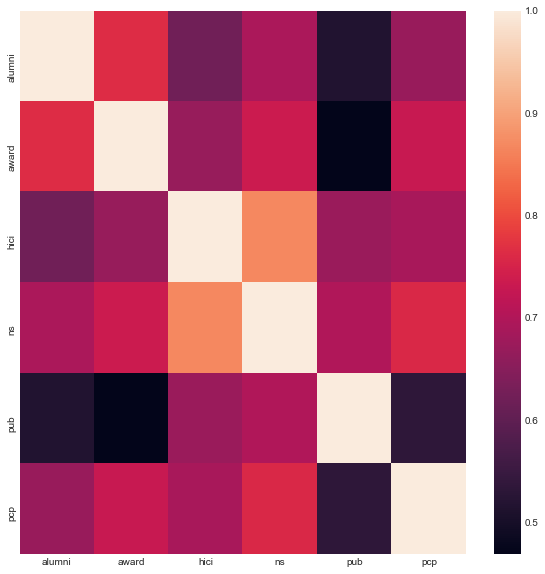

In [516]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df_shang_reg[['alumni', 'award', 'hici', 'ns', 'pub','pcp']].corr())

comment on this correlation matrix

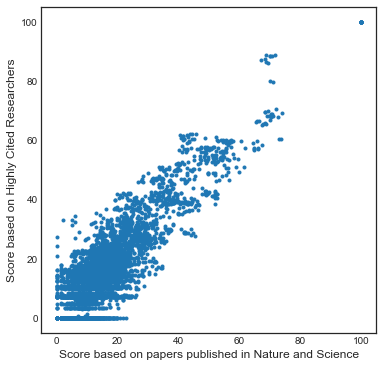

In [530]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df_shang.ns,df_shang.hici,marker='.')
ax.set_ylabel('Score based on Highly Cited Researchers',fontsize=12);
ax.set_xlabel('Score based on papers published in Nature and Science',fontsize=12);

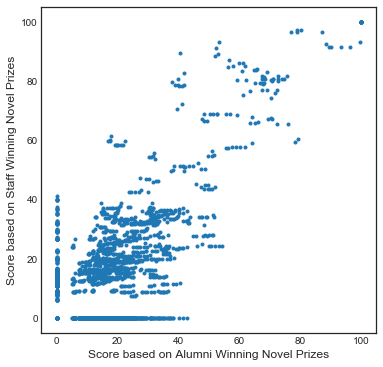

In [531]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(df_shang.alumni,df_shang.award,marker='.')
ax.set_ylabel('Score based on Staff Winning Novel Prizes',fontsize=12);
ax.set_xlabel('Score based on Alumni Winning Novel Prizes',fontsize=12);

In [430]:
df_shang['fit'] = (df_shang['alumni']*result.params.alumni +
                         df_shang['award']*result.params.award + 
                         df_shang['hici']*result.params.hici + 
                         df_shang['ns']*result.params.ns +
                         df_shang['pub']*result.params.pub + 
                         df_shang['pcp']*result.params.pcp)
df_shang['residual'] = df_shang.fit - df_shang.total_score

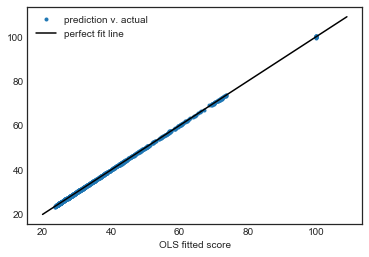

In [432]:
fig,ax = plt.subplots()
ax.plot(df_shang.total_score,df_shang.fit,'.',label='prediction v. actual')
ax.plot(range(20,110),range(20,110),'k',label='perfect fit line')
ax.set_xlabel('actual score')
ax.set_xlabel('OLS fitted score')
plt.legend()

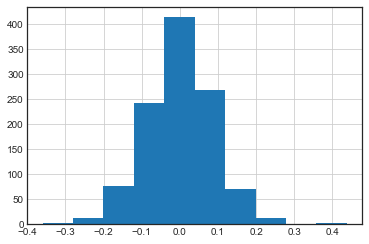

In [433]:
(df_shang.residual).round(3).hist()

comment on the residual plot and historgram of residuals. Residuals are split evenly distributed. Good.

### Undergrad @ McMaster University

Looking at my undergrad instituition. Mac is a research university in southern Ontario, Canada. Some statistics on the school:

* established in 1887
* about 30,000 students
    * 25,000 undergrad, 5,000 graduate
* vast majority of student body is from Ontario (91%)!

http://www.mcmaster.ca/<br>
https://en.wikipedia.org/wiki/McMaster_University

Below I want to look at the AWRU ranking indicators a little closer for Mac

In [434]:
mac_shang = df_shang[df_shang.university_name=='McMaster University'];
mac_shang.world_rank = [int(i) for i in mac_shang.world_rank];
mac_shang.set_index('year',inplace=True,drop=True)
mac_shang

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,fit,residual
year,,,,,,,,,,,,
2005,90,McMaster University,4,24.9,16.6,19.3,22.2,15.9,43.5,23.9,24.899735,-0.000265
2006,90,McMaster University,4,24.7,16.0,18.9,21.8,14.2,44.6,25.6,24.723210,0.023210
2007,87,McMaster University,4,25.0,15.6,18.9,22.2,14.3,45.4,25.7,24.959586,-0.040414
2008,89,McMaster University,4,25.1,14.8,18.9,21.9,14.7,46.1,26.4,25.112235,0.012235
2009,91,McMaster University,4,24.6,14.5,18.9,22.9,14.4,45.3,22.6,24.674942,0.074942
2010,88,McMaster University,4,25.2,14.1,18.9,22.8,14.8,47.3,22.8,25.126540,-0.073460
2011,89,McMaster University,4,25.3,14.4,18.9,23.9,16.7,45.2,21.9,25.251230,-0.048770
2012,92,McMaster University,4,25.0,13.3,19.4,24.0,15.6,45.2,21.5,24.994534,-0.005466
2013,92,McMaster University,4.0,24.9,13.1,19.0,24.0,16.0,44.7,21.6,24.881157,-0.018843


McMaster has ranked consistently as the fourth best University in Canada over the past 11 years - according to the AWRU ranking. 

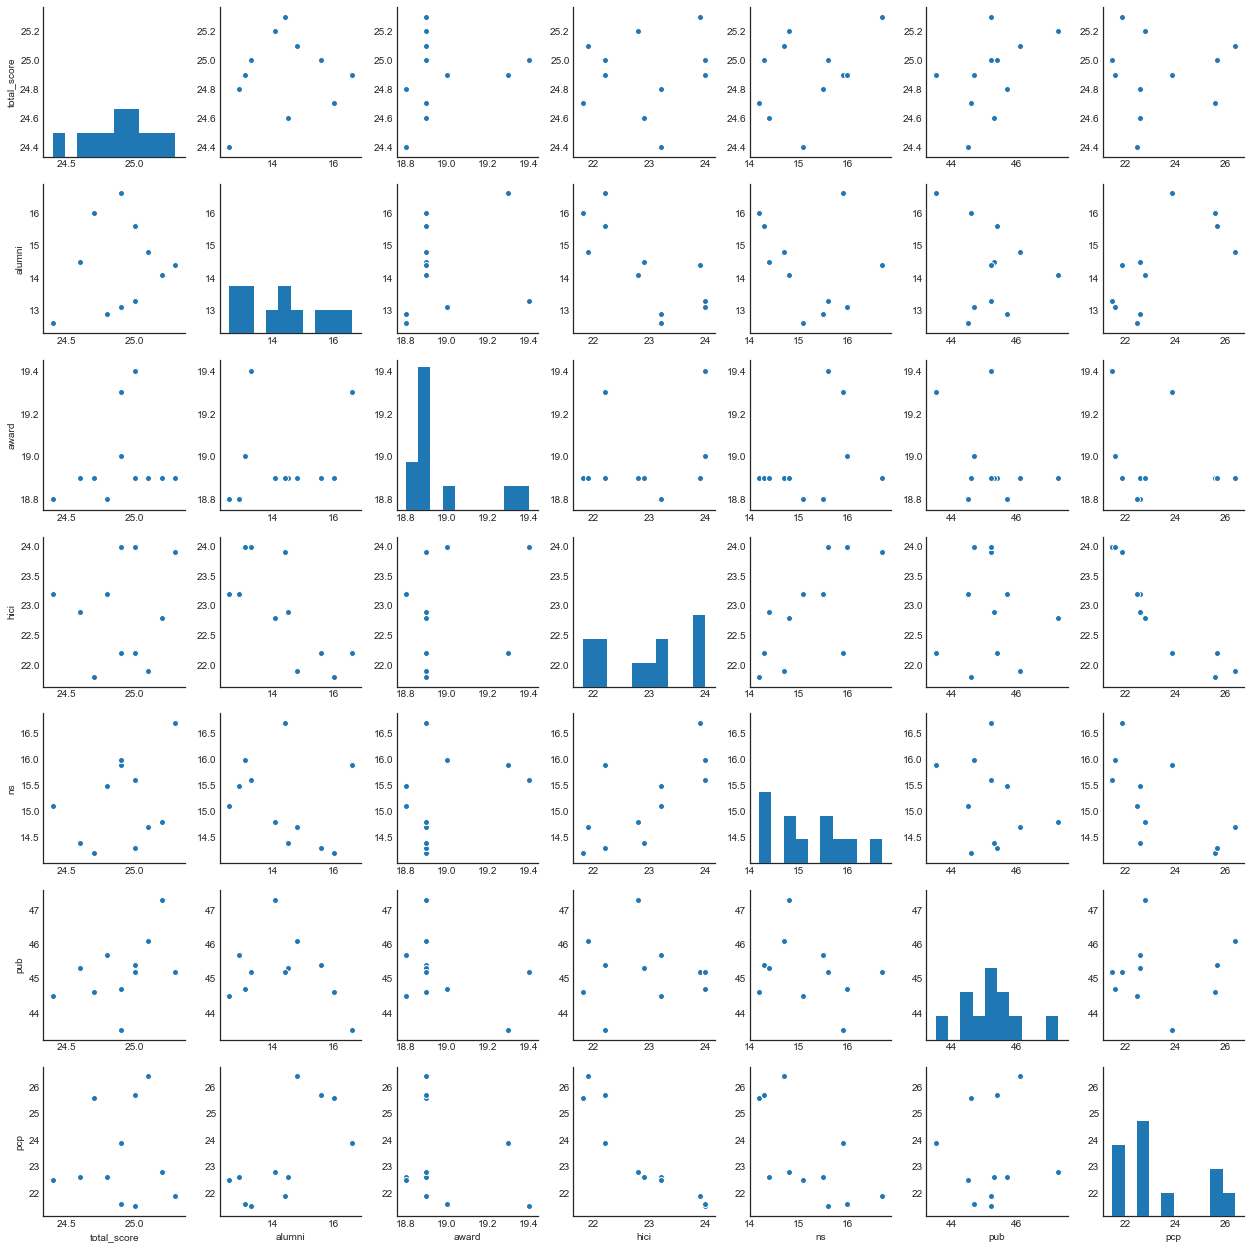

In [375]:
sns.pairplot(mac_shang[cols])

no obvious multi-colinearity, possibly between the *hici* and *pcp* variables

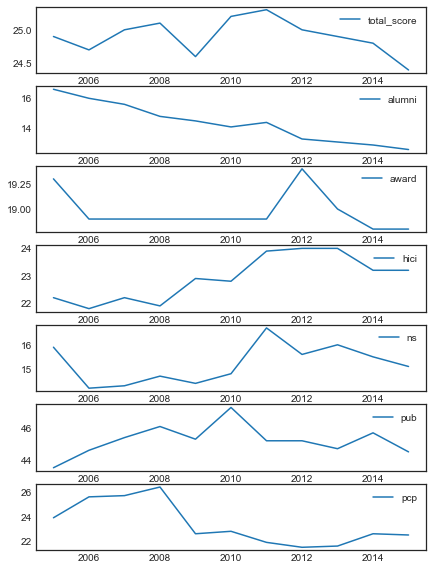

In [393]:
fig,axes = plt.subplots(len(cols),1,figsize=(7,10))
for i,c in enumerate(cols):
    axes[i].plot(mac_shang.index,mac_shang[c],label=c)
    axes[i].legend()

looks like a clear downward trend in the *alumni* variable. The *alumni* score has been on a steady decline for the past 11 years. Conversely, the the *hici* variable (recall: score based on number of Highly Cited Researchers selected by Thomson Reuters) looks to have been on a steady upward trend over the past 11 years. 

In [496]:
reg = LinearRegression()
reg.fit(mac_shang[['year']], mac_shang[['world_rank']])
reg2_shang = np.round(reg.score(mac_shang[['year']], mac_shang[['world_rank']]),2) #0.37

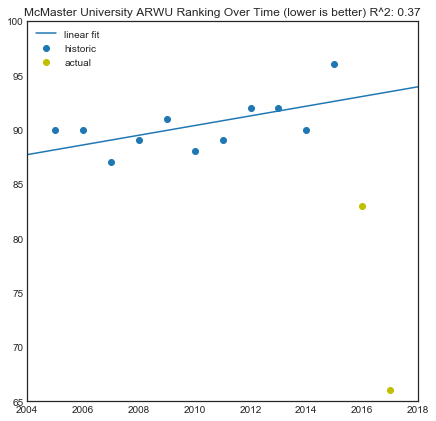

In [507]:
x = range(1990,2100)
fig,ax = plt.subplots(figsize=(7,7))
plt.scatter(mac_shang.index.values,mac_shang.world_rank,label='historic')
ax.plot(x, [float(reg.intercept_) + float(reg.coef_) * i for i in x],label='linear fit')
plt.scatter([2016,2017],[83,66],c='y',label='actual')
ax.set_xlim([2004, 2018])
ax.set_ylim([65, 100])
ax.set_title('McMaster University ARWU Ranking Over Time (lower is better) R^2: {0}'.format(reg2_shang));
plt.legend(loc=2);

Comment on the poorness of the linear regression, how come the 2017 actual ranking is way off. 

### Cool Plot!! :)

Matplotlib plotting exercise based off:
http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ <br>
First start withlist of beautiful colors:

In [532]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

Re-organizing the data towards a spaghetti-like plot

In [533]:
df_shang_filt = df_shang[~df_shang.world_rank.str.contains('-')] #remove entries with '-'
df_shang_filt.world_rank = [int(i) for i in df_shang_filt.world_rank] #convert the string ranks to int
df_shang_filt2 = df_shang_filt.groupby(by=['university_name','year']).max() #group by year and university
df_shang_wr = df_shang_filt2.world_rank.unstack().T #tranpose the dataframe

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


There is duplicate values for UC Berkeley and Johns Hopkins - they're listed under two different names each. Below I correct for that.

In [534]:
berkeley_rank = df_shang_wr['University of California, Berkeley'].replace(np.NaN,4)
jhp_rank = df_shang_wr['The Johns Hopkins University'].replace(np.NaN,16)
df_shang_wr.drop('University of California, Berkeley', axis=1, inplace=True)
df_shang_wr.drop('University of California-Berkeley', axis=1, inplace=True)
df_shang_wr['University of California, Berkeley'] = berkeley_rank
df_shang_wr.drop('Johns Hopkins University', axis=1, inplace=True)
df_shang_wr.drop('The Johns Hopkins University', axis=1, inplace=True)
df_shang_wr['Johns Hopkins University'] = jhp_rank

Dataframes now ready for the plotting, just need to drop NaNs along a few dimensions and sort

In [535]:
df_shang_plot = df_shang_wr[df_shang_wr<=15].dropna(axis=1,how='all').T
df_shang_plot = df_shang_plot.dropna(axis=0,how='any',subset=[2015])
df_shang_plot = df_shang_plot.sort_values(by=2015)

Setting seaborn styles

In [536]:
sns.set_style("white")
sns.despine;

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


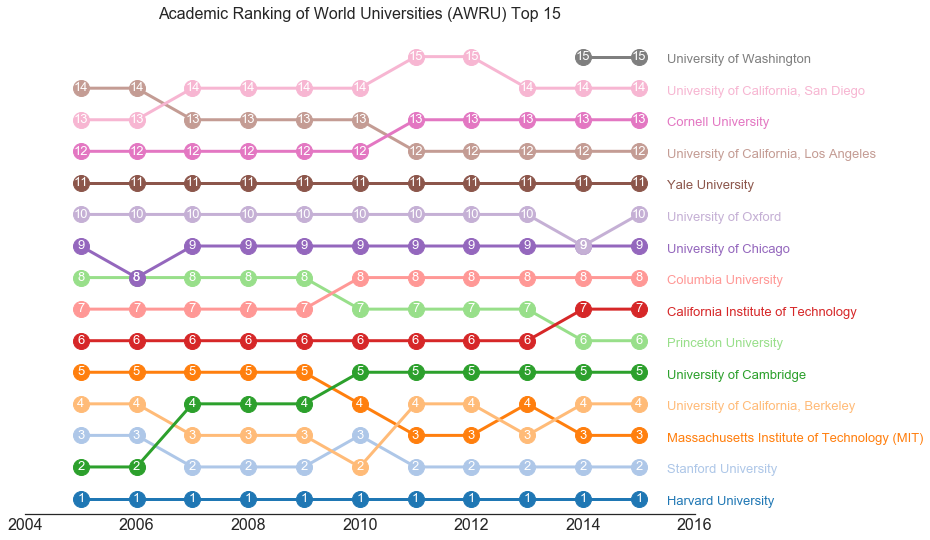

In [537]:
fig,ax = plt.subplots(figsize=(12,9))
for i,u in enumerate(df_shang_plot.T):
    plt.plot(df_shang_plot.columns.values,
             df_shang_plot.ix[u].values,    
             lw=3,marker='o',markersize=16, color=tableau20[i])  
    final_pos = df_shang_plot.ix[u][2015] - 0.2
    first_pos = df_shang_plot.ix[u][2005] - 0.2
    if str(final_pos) != 'nan':
        plt.text(2015.5, final_pos, u, fontsize=13, color=tableau20[i])
    
for i in df_shang_plot.index:
    for c in df_shang_plot.columns:
        try:
            ax.annotate('{0}'.format(int(df_shang_plot.ix[i][c])),
                        xy=(c,df_shang_plot.ix[i][c]),
                        textcoords='data',ha="center", 
                        va="center",color='white',fontsize=13)
        except:
            pass
        
ax.set_xlim([2004,2016])
ax.set_ylim([0.5,16])
ax.yaxis.set_visible(False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.grid(False)
ax.set_title('Academic Ranking of World Universities (AWRU) Top 15',fontsize=16);
sns.despine(left=True)